# Zuber-Rideshare-Analysis-SQL

In this project, I'm assuming the role of an analyst at Zuber, an up-and-coming ride-sharing service entering the Chicago market. My primary objective is to dive into the data and unravel patterns derived from the insights I've gleaned using ProstSQL. With this information in hand, I'll aim to pinpoint the company with the most trips, identify the drop-off and pickup locations with the highest trip counts, and put a hypothesis about how weather influences ride frequency to the test.

## Description of the data

### Dropoff_location.csv.It contains the following data:
* drop_location: Chicago neighborhoods where rides ended
* n_trip:total number of rides that ended in each neighborhood

### Rides_per_company.csv.It contains the following data
* company: taxi company name
* trips_amount:the number of rides for each taxi company

### Pickup_location.csv:It contains the following data
* pickup_location: Chicago neighborhoods where rides started
* n_trop: number of rides that ended in each neighborhood

### Weather_condition.csv:It contains the following data
* start_ts:date and time of the beginning of the ride that started in the Loop and ended at O'Hare
* Weather_conditions: When the description matches 'rain' or contains '%storm%', we categorize it as 'Bad'; otherwise, it's classified as 'Good'.
* duration_second:ride duration in seconds where ride that started in the Loop and ended at O'Hare

## Load the data and Prepocessing

In [30]:
#load the libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats 

In [31]:
drop_off=pd.read_csv('Dropoff_location.csv')
drop_off.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   drop_location  94 non-null     object
 1   n_trip         94 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [32]:
#check for missing values
drop_off.isna().sum()

drop_location    0
n_trip           0
dtype: int64

In [33]:
#check for duplicates
print(drop_off.duplicated().sum())

0


In [34]:
company_ride=pd.read_csv('Rides_per_company.csv')
company_ride.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  55 non-null     object
 1   trips_amount  55 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1008.0+ bytes


In [35]:
# check for missing value
company_ride.isna().sum()

company_name    0
trips_amount    0
dtype: int64

In [36]:
# check for duplicates
print(company_ride.duplicated().sum())

0


In [37]:
pick_up=pd.read_csv('Pickup_location.csv')
pick_up.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   pickup_location  94 non-null     object
 1   n_trip           94 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [38]:
#check for missing value
pick_up.isna().sum()

pickup_location    0
n_trip             0
dtype: int64

In [39]:
#check for duplicates
print(pick_up.duplicated().sum())

0


After check three datasets,there are no duplicates and missing values  

### Top ten companies with highest number of rides

In [40]:
#sort values 
sorted_data=company_ride.sort_values(by='trips_amount',ascending=False).head(10)
display(sorted_data)

,company_name,trips_amount
0,Flash Cab,253347
1,Taxi Affiliation Services,147530
2,Yellow Cab,129727
3,Medallion Leasin,121119
4,Taxi Affiliation Service Yellow,116632
5,Chicago Carriage Cab Corp,112087
6,City Service,104124
7,Star North Management LLC,91322
8,Sun Taxi,89605
9,Blue Ribbon Taxi Association Inc.,72414


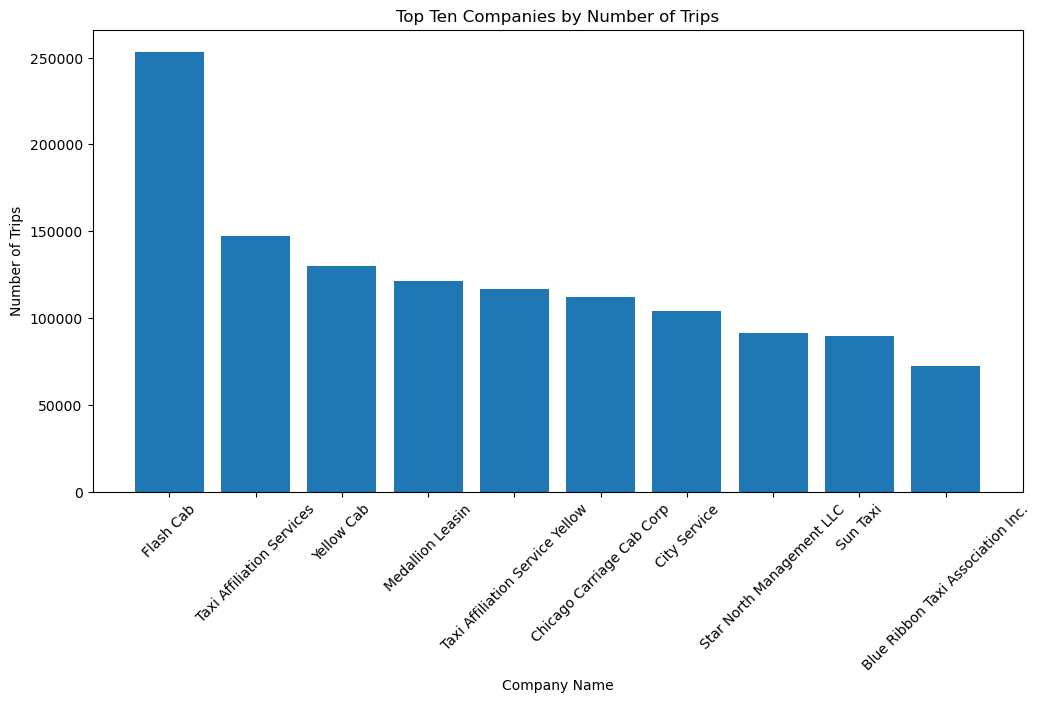

In [41]:
#Visualizaztion for the first ten companies
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

plt.bar(sorted_data['company_name'], sorted_data['trips_amount'])
plt.xlabel('Company Name')
plt.ylabel('Number of Trips')
plt.title('Top Ten Companies by Number of Trips')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

Top Companies with highest number of trip are Flash Cab, Taxi Affliliation Services,Yellow Cap

### Number of trips for each dropoff location

In [42]:
drop_off.sort_values(by='n_trip',ascending=False).head(10)


,drop_location,n_trip
0,Loop,321824
1,River North,285710
2,Streeterville,199940
3,West Loop,154910
4,O'Hare,76407
5,Lake View,72629
6,Grant Park,62056
7,Museum Campus,45300
8,Gold Coast,40927
9,Sheffield & DePaul,37793


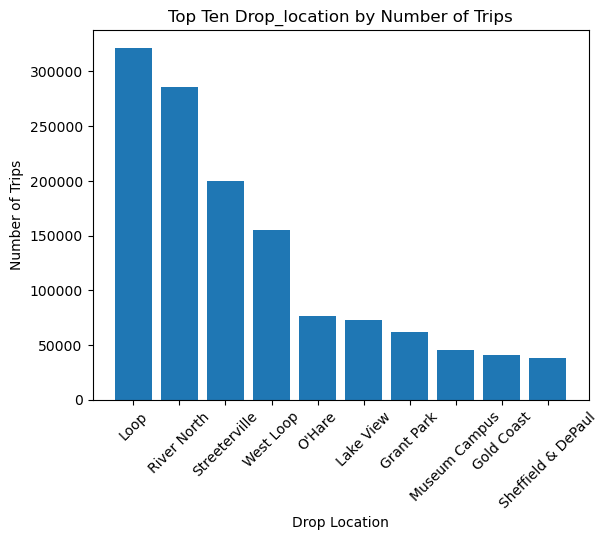

In [43]:
sort_drop_off=drop_off.sort_values(by='n_trip',ascending=False).head(10)
#Visualizaztion for the first ten companies
# Adjust the figure size as needed

plt.bar(sort_drop_off['drop_location'], sort_drop_off['n_trip'])
plt.xlabel('Drop Location')
plt.ylabel('Number of Trips')
plt.title('Top Ten Drop_location by Number of Trips')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

We have identified that Loop, River North, and Streeterville are the highest drop-off locations based on the number of trips

### Number of trips for each pickup location

In [44]:
#sort pick_dataset and show top 10 pick_up location
pick_up.sort_values(by='n_trip',ascending=False).head(10)


,pickup_location,n_trip
0,Loop,404495
1,River North,333486
2,Streeterville,195674
3,West Loop,139846
4,O'Hare,114684
5,Grant Park,64107
6,Lake View,54027
7,Museum Campus,37306
8,Gold Coast,35248
9,Garfield Ridge,34879


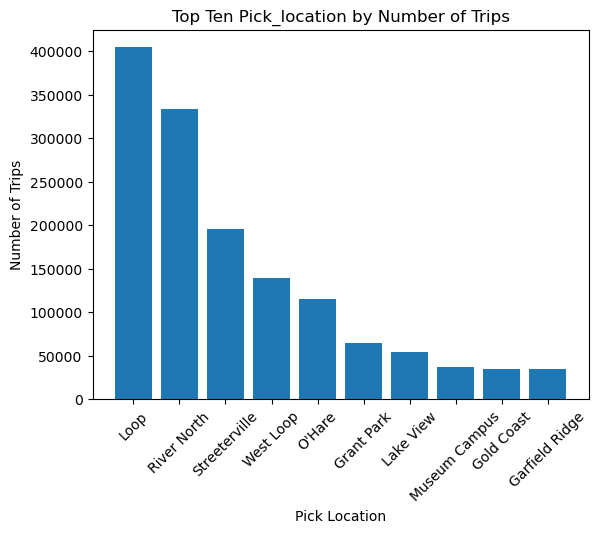

In [45]:
sort_pick_up=pick_up.sort_values(by='n_trip',ascending=False).head(10)

plt.bar(sort_pick_up['pickup_location'], sort_pick_up['n_trip'])
plt.xlabel('Pick Location')
plt.ylabel('Number of Trips')
plt.title('Top Ten Pick_location by Number of Trips')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

We have identified that Loop, River North, and Streeterville are the highest pick-off locations based on the number of trips

## Prepare data for testing hypotheses

In [46]:
weather_condition=pd.read_csv('Weather_condition.csv')
weather_condition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   start_ts            200 non-null    object
 1   weather_conditions  200 non-null    object
 2   duration_seconds    200 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 4.8+ KB


In [47]:
#check for missing values
weather_condition.isna().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

In [48]:
weather_condition.head(10)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 12:00,Good,1380
1,2017-11-25 16:00,Good,2410
2,2017-11-25 14:00,Good,1920
3,2017-11-25 12:00,Good,1543
4,2017-11-04 10:00,Good,2512
5,2017-11-11 7:00,Good,1440
6,2017-11-11 4:00,Good,1320
7,2017-11-04 16:00,Bad,2969
8,2017-11-18 11:00,Good,2280
9,2017-11-04 16:00,Bad,3120


### Hypothesis:

Null: There is no significant difference in the average duration of rides between the Loop and O'Hare International Airport on rainy Saturdays.

Alternative: The average duration of rides from the Loop to O'Hare International Airport significantly varies on rainy Saturdays.

The null hypothesis assumes no distinction between the two populations, while the alternative hypothesis posits a notable difference. A standard alpha level of 0.05 was selected.

In [49]:
import scipy.stats as st

# Load your data from "Weather_condition.csv" into a DataFrame
weather_condition = pd.read_csv("Weather_condition.csv")

# Defining the two populations to test
good = weather_condition[weather_condition['weather_conditions'] == 'Good']['duration_seconds']
bad = weather_condition[weather_condition['weather_conditions'] == 'Bad']['duration_seconds']

# Define a function to perform the t-test
def t_test(sample1, sample2, alpha=0.05):
    p_value_levene = st.levene(sample1, sample2).pvalue
    if p_value_levene < alpha:
        option_var = False
    else:
        option_var = True
    p_value = st.ttest_ind(sample1, sample2, nan_policy='omit', equal_var=option_var).pvalue
    if p_value < alpha:
        print('We reject the null hypothesis: The average of sample 1 is not equal to the average of sample 2')
    else:
        print("Fail to reject the null hypothesis: We don't have enough evidence to say that averages of sample 1 and sample 2 are not the same")

# Apply t_test to good and bad weather
t_test(good, bad, alpha=0.05)


We reject the null hypothesis: The average of sample 1 is not equal to the average of sample 2


### Conclusion

The top-ranking drop-off location is undoubtedly the Loop, closely trailed by River North. Flash Cab emerges as the clear frontrunner among cab companies, significantly outpacing its competitors in terms of the number of trips. An interesting discovery from our hypothesis testing reveals that the average duration of rides between the Loop and O'Hare International Airport exhibits variations on rainy Saturdays. This suggests that weather conditions play a notable role in shaping ride durations on specific days